In [7]:
# Carga el Drive
#from google.colab import drive
#drive.mount('/content/drive')

## Introduccion

Este trabaja se enfoca en la retención de empleados, un tema crucial para cualquier empresa, ya que la salida de personal (Desercion) puede generar altos costos y dificultades para reemplazar talento y experiencia. Utilizando datos de IBM, se realizará la  extracción, transformación y carga  (ETL).
Se realizara un análisis exploratorio de datos en Python que incluya:

1. Carga e inspeccion del dataset.
2. Visualización de las columnas.
3. Detección y manejo de valores nulos.
4. Detección y manejo de registros duplicados.
5. Resumen estadístico de las Columnas Numéricas.
6. Transformacion de datos.
7. Exportar CSV Limpio.



Fuente de datos : https://www.kaggle.com/code/mrshih/attention-to-retention-ibm-data

## Importacíon de librerias

In [8]:
#import re
#import sketch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import geopandas as gpd
#from shapely.geometry import Point, Polygon
#import geojson
#import folium
#from folium.plugins import HeatMap
#from summarytools import dfSummary

##  Carga de Datos

In [9]:
datos = pd.read_csv('C:\Clases _ Phyton\WA_Fn-UseC_-HR-Employee-Attrition.csv')

Renombrar Columnas: Se renombran columanas al castellano para una mejor interpretacion

In [10]:
datos.rename(columns={
    'Age': 'Edad',
    'Attrition': 'Desercion',
    'BusinessTravel': 'Viaje_de_Negocios',
    'DailyRate': 'Tarifa_Diaria',
    'Department': 'Departamento',
    'DistanceFromHome': 'Distancia_desde_el_Hogar',
    'Education': 'Educacion',
    'EducationField': 'Campo_de_Educacion',
    'EmployeeCount': 'Conteo_de_Empleados',
    'EmployeeNumber': 'Numero_de_Empleado',
    'EnvironmentSatisfaction': 'Satisfaccion_con_el_Entorno',
    'Gender': 'Genero',
    'HourlyRate': 'Tarifa_por_Hora',
    'JobInvolvement': 'Compromiso_Laboral',
    'JobLevel': 'Nivel_de_Trabajo',
    'JobRole': 'Rol_de_Trabajo',
    'JobSatisfaction': 'Satisfaccion_Laboral',
    'MaritalStatus': 'Estado_Civil',
    'MonthlyIncome': 'Ingreso_Mensual',
    'MonthlyRate': 'Tarifa_Mensual',
    'NumCompaniesWorked': 'Numero_de_Empresas_Trabajadas',
    'Over18': 'Mayor_de_18',
    'OverTime': 'Horas_Extra',
    'PercentSalaryHike': 'Porcentaje_de_Aumento_Salarial',
    'PerformanceRating': 'Evaluacion_de_Desempeno',
    'RelationshipSatisfaction': 'Satisfaccion_en_Relaciones',
    'StandardHours': 'Horas_Estandar',
    'StockOptionLevel': 'Nivel_de_Acciones',
    'TotalWorkingYears': 'Total_de_Anios_Trabajados',
    'TrainingTimesLastYear': 'Tiempo_de_Capacitacion_Ultimo_Ano',
    'WorkLifeBalance': 'Equilibrio_Vida_Trabajo',
    'YearsAtCompany': 'Anios_en_la_Empresa',
    'YearsInCurrentRole': 'Anios_en_el_Rol_Actual',
    'YearsSinceLastPromotion': 'Anios_desde_la_Ultima_Promocion',
    'YearsWithCurrManager': 'Anios_con_el_Actual_Gerente'
}, inplace=True)


Se observa nombre de las variables :

## Se visualizan las columnas del DataFrame

In [11]:
column_df = pd.DataFrame(datos.columns, columns=['Column Names'])
column_df

,Column Names
0,Edad
1,Desercion
2,Viaje_de_Negocios
3,Tarifa_Diaria
4,Departamento
5,Distancia_desde_el_Hogar
6,Educacion
7,Campo_de_Educacion
8,Conteo_de_Empleados
9,Numero_de_Empleado


otra forma

In [12]:
print("Columnas en el conjunto de datos:")
print(datos.columns.tolist())

Columnas en el conjunto de datos:
['Edad', 'Desercion', 'Viaje_de_Negocios', 'Tarifa_Diaria', 'Departamento', 'Distancia_desde_el_Hogar', 'Educacion', 'Campo_de_Educacion', 'Conteo_de_Empleados', 'Numero_de_Empleado', 'Satisfaccion_con_el_Entorno', 'Genero', 'Tarifa_por_Hora', 'Compromiso_Laboral', 'Nivel_de_Trabajo', 'Rol_de_Trabajo', 'Satisfaccion_Laboral', 'Estado_Civil', 'Ingreso_Mensual', 'Tarifa_Mensual', 'Numero_de_Empresas_Trabajadas', 'Mayor_de_18', 'Horas_Extra', 'Porcentaje_de_Aumento_Salarial', 'Evaluacion_de_Desempeno', 'Satisfaccion_en_Relaciones', 'Horas_Estandar', 'Nivel_de_Acciones', 'Total_de_Anios_Trabajados', 'Tiempo_de_Capacitacion_Ultimo_Ano', 'Equilibrio_Vida_Trabajo', 'Anios_en_la_Empresa', 'Anios_en_el_Rol_Actual', 'Anios_desde_la_Ultima_Promocion', 'Anios_con_el_Actual_Gerente']


## Inspección de Datos

### Inspeccionamos el contenido del DataFrame para obtener una visión general de los datos.

Se observan los tipos de datos de las columnas, para saber que tipo de datos se tienen y si se requieren transformaciones.

In [13]:
print(datos.dtypes)

Edad                                  int64
Desercion                            object
Viaje_de_Negocios                    object
Tarifa_Diaria                         int64
Departamento                         object
Distancia_desde_el_Hogar              int64
Educacion                             int64
Campo_de_Educacion                   object
Conteo_de_Empleados                   int64
Numero_de_Empleado                    int64
Satisfaccion_con_el_Entorno           int64
Genero                               object
Tarifa_por_Hora                       int64
Compromiso_Laboral                    int64
Nivel_de_Trabajo                      int64
Rol_de_Trabajo                       object
Satisfaccion_Laboral                  int64
Estado_Civil                         object
Ingreso_Mensual                       int64
Tarifa_Mensual                        int64
Numero_de_Empresas_Trabajadas         int64
Mayor_de_18                          object
Horas_Extra                     

Se muestra  la  dimension  del dataset:

In [14]:
print(f"Tiene : {datos.shape[0]} filas y {datos.shape[1]} columnas")

Tiene : 1470 filas y 35 columnas


In [15]:
# Mostrar algunas filas aleatorias del conjunto de datos
datos.sample(5)

,Edad,Desercion,Viaje_de_Negocios,Tarifa_Diaria,Departamento,Distancia_desde_el_Hogar,Educacion,Campo_de_Educacion,Conteo_de_Empleados,Numero_de_Empleado,...,Satisfaccion_en_Relaciones,Horas_Estandar,Nivel_de_Acciones,Total_de_Anios_Trabajados,Tiempo_de_Capacitacion_Ultimo_Ano,Equilibrio_Vida_Trabajo,Anios_en_la_Empresa,Anios_en_el_Rol_Actual,Anios_desde_la_Ultima_Promocion,Anios_con_el_Actual_Gerente
69,36,Yes,Travel_Rarely,318,Research & Development,9,3,Medical,1,90,...,1,80,1,2,0,2,1,0,0,0
248,37,No,Travel_Rarely,1017,Research & Development,1,2,Medical,1,340,...,1,80,1,17,2,2,3,1,0,2
828,18,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,...,4,80,0,0,0,3,0,0,0,0
1259,30,No,Travel_Rarely,305,Research & Development,16,3,Life Sciences,1,1763,...,3,80,1,10,3,3,7,0,1,7
402,30,No,Travel_Rarely,1082,Sales,12,3,Technical Degree,1,533,...,2,80,0,6,6,3,5,4,4,4


### Tipos de datos y valores NO nulos :


In [16]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Edad                               1470 non-null   int64 
 1   Desercion                          1470 non-null   object
 2   Viaje_de_Negocios                  1470 non-null   object
 3   Tarifa_Diaria                      1470 non-null   int64 
 4   Departamento                       1470 non-null   object
 5   Distancia_desde_el_Hogar           1470 non-null   int64 
 6   Educacion                          1470 non-null   int64 
 7   Campo_de_Educacion                 1470 non-null   object
 8   Conteo_de_Empleados                1470 non-null   int64 
 9   Numero_de_Empleado                 1470 non-null   int64 
 10  Satisfaccion_con_el_Entorno        1470 non-null   int64 
 11  Genero                             1470 non-null   object
 12  Tarifa

Detección de Valores Nulos, Se visualizan los valores nulos en cada columna:

In [17]:
# Análisis de valores nulos
print("\nValores nulos por columna:")
print(datos.isnull().sum())


Valores nulos por columna:
Edad                                 0
Desercion                            0
Viaje_de_Negocios                    0
Tarifa_Diaria                        0
Departamento                         0
Distancia_desde_el_Hogar             0
Educacion                            0
Campo_de_Educacion                   0
Conteo_de_Empleados                  0
Numero_de_Empleado                   0
Satisfaccion_con_el_Entorno          0
Genero                               0
Tarifa_por_Hora                      0
Compromiso_Laboral                   0
Nivel_de_Trabajo                     0
Rol_de_Trabajo                       0
Satisfaccion_Laboral                 0
Estado_Civil                         0
Ingreso_Mensual                      0
Tarifa_Mensual                       0
Numero_de_Empresas_Trabajadas        0
Mayor_de_18                          0
Horas_Extra                          0
Porcentaje_de_Aumento_Salarial       0
Evaluacion_de_Desempeno             

In [18]:
import missingno as msno

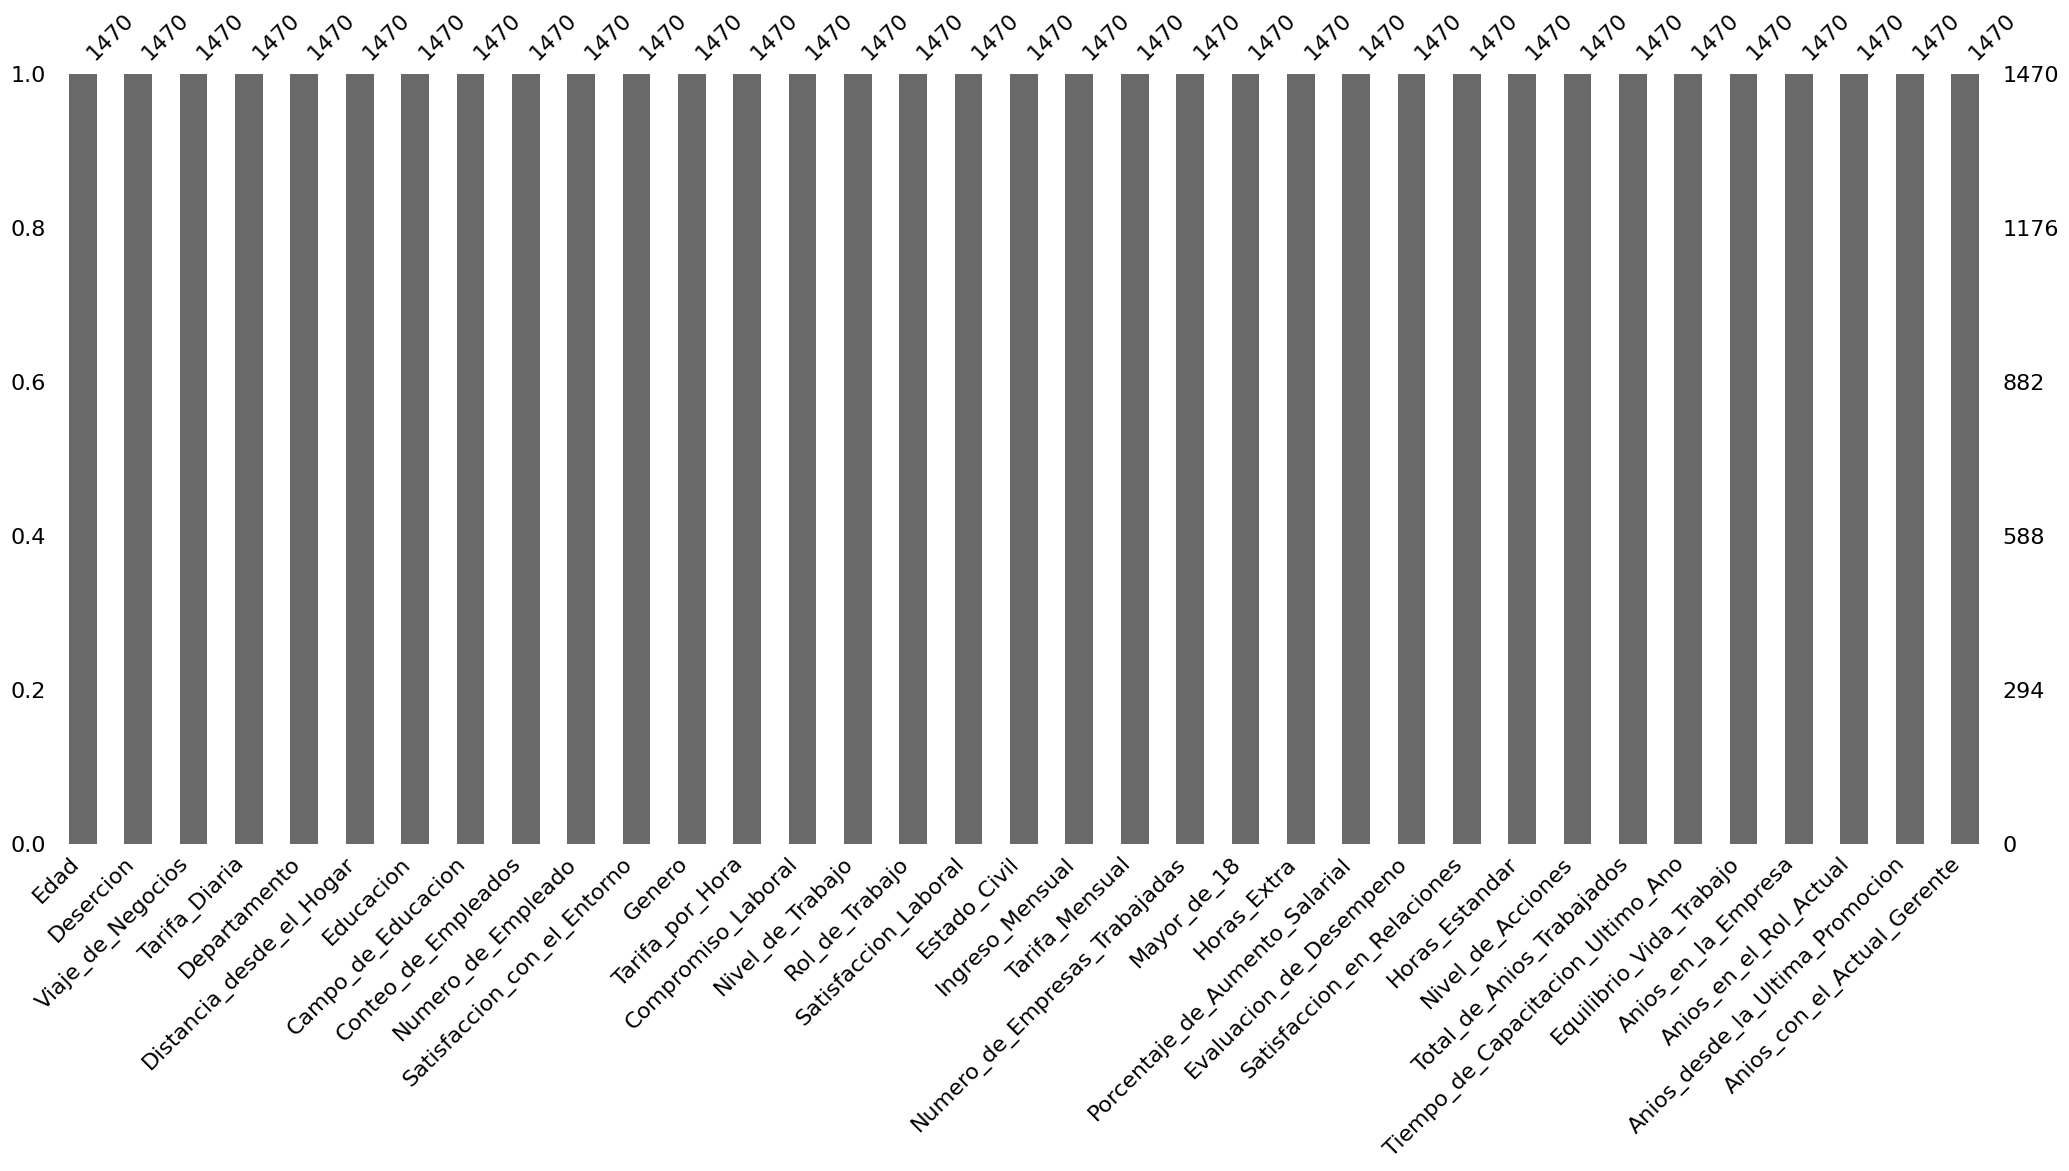

In [19]:
# Visualización de valores nulos
msno.bar(datos)
plt.show()

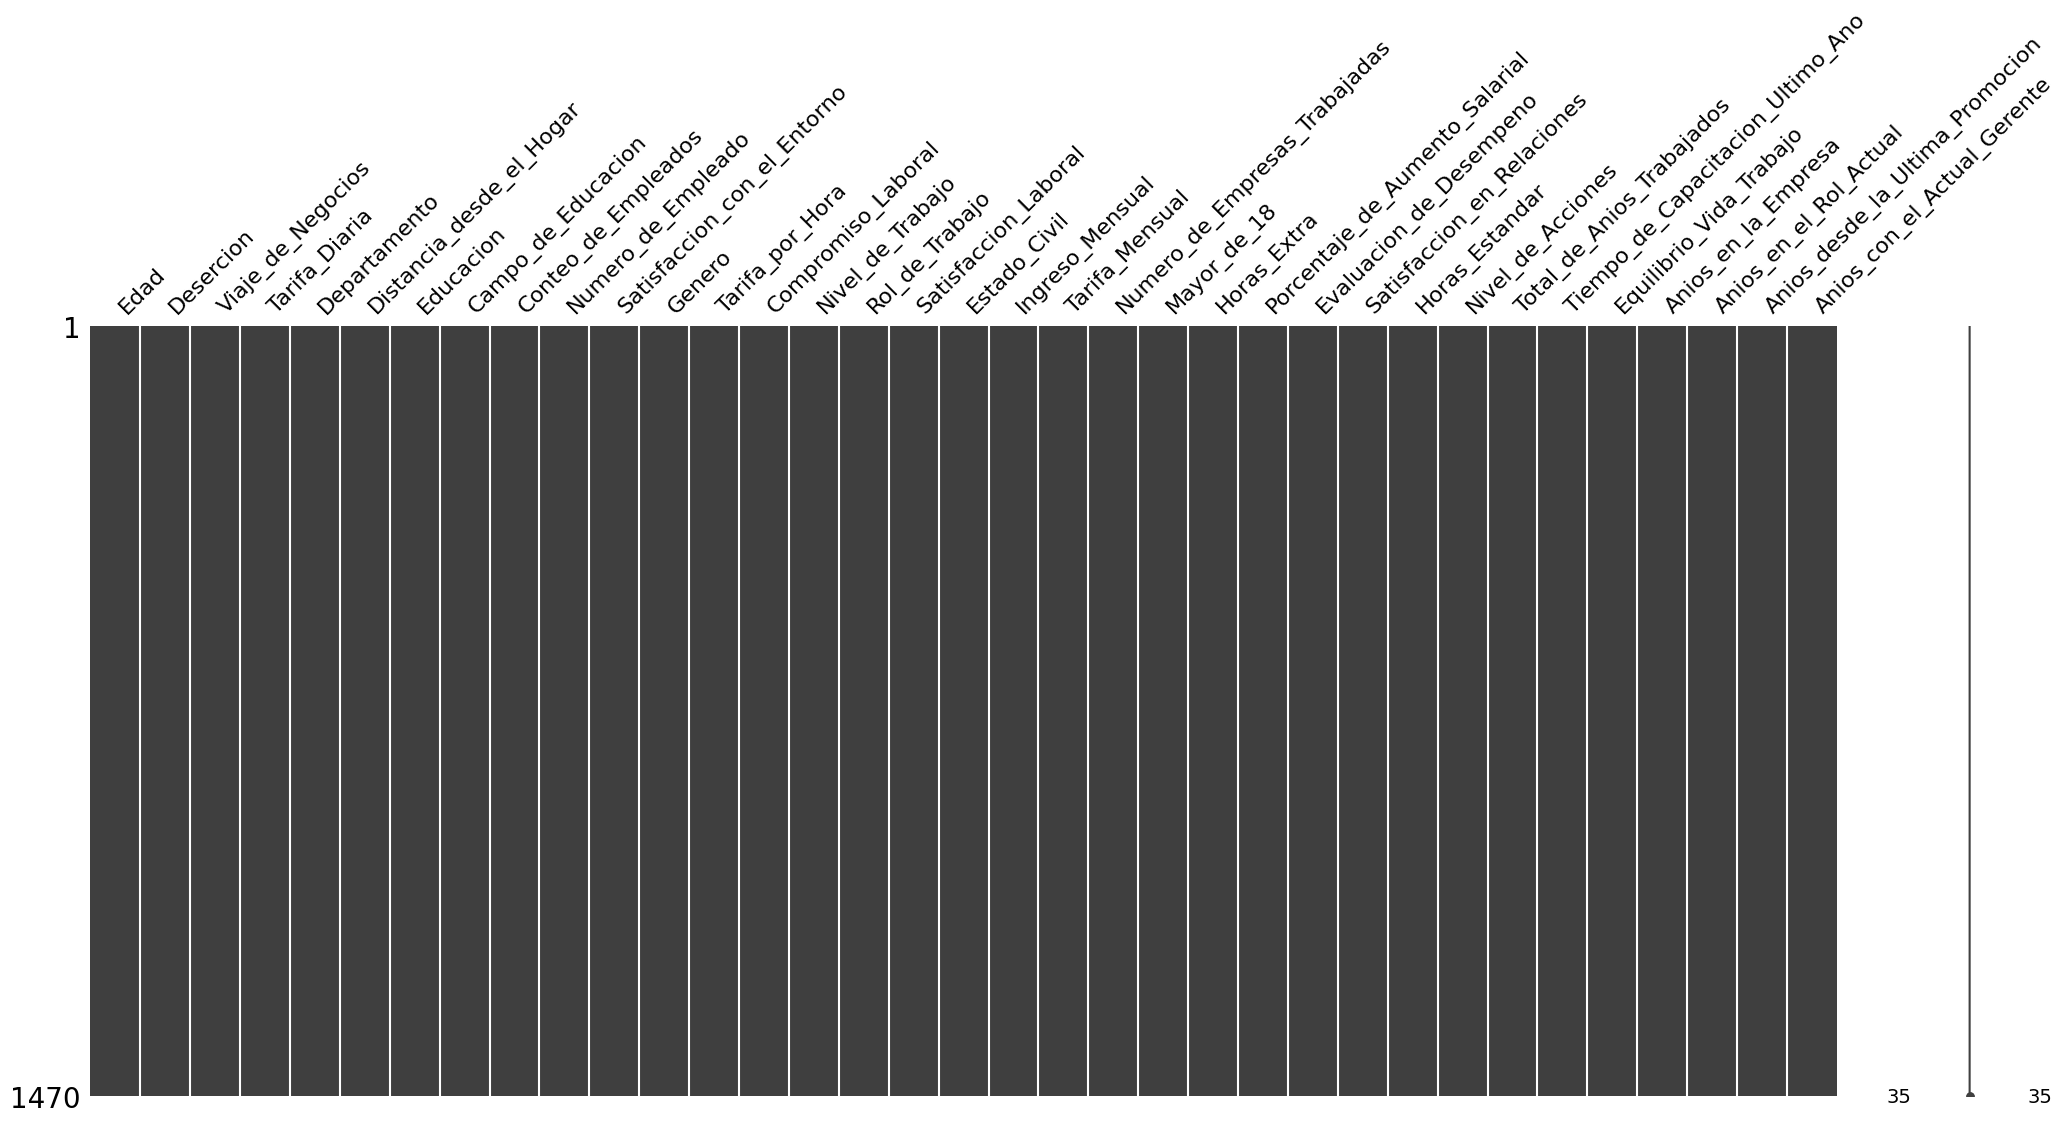

In [20]:
msno.matrix(datos)
plt.show()

Eliminar columnas con muchos valores nulos: N/A (No  Aplica ) ya que el dataset no tiene valores nulos.



In [21]:
data = datos.dropna(axis=1)

#### Nota :



1. dropna(): Este es un método de los DataFrames de Pandas que se utiliza para eliminar filas o columnas que contengan valores nulos (NaN, Not a Number).
2. axis=1: Este argumento especifica que se deben eliminar las columnas que contengan al menos un valor nulo. Si se estableciera axis=0, se eliminarían las filas.




### Rellenar valores nulos con un valor específico (por ejemplo, la media): N/A (No Aplica)ya que el dataset no tiene valores nulos.

In [22]:
# Convert columns with 'Yes' and 'No' to 1 and 0
for col in datos.columns:
    if datos[col].dtype == 'object' and 'Yes' in datos[col].values and 'No' in datos[col].values:
        datos[col] = datos[col].map({'Yes': 1, 'No': 0})

# Fill NaN values with the mean of each column for numeric columns only
for col in datos.columns:
    if datos[col].dtype in ['int64', 'float64']: # Check if column is numeric
        datos[col].fillna(datos[col].mean(), inplace=True)

C:\Users\luisf\AppData\Local\Temp\ipykernel_25052\1804585489.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos[col].fillna(datos[col].mean(), inplace=True)


### Nota


1.   datos.mean(): Esta expresión calcula la media (promedio) de cada columna del dataframe
2.   inplace=True: Este argumento indica que se debe modificar el DataFrame data directamente en lugar de crear un nuevo DataFrame con los cambios.nota

### Identificación de Duplicados :


Es posible que haya filas duplicadas que puedan distorsionar el análisis.

In [23]:
# Análisis de duplicados
duplicados = datos.duplicated()
print(f"\nNúmero de filas duplicadas: {duplicados.sum()}")


Número de filas duplicadas: 0


Eliminacion de duplicadas:N/A (No Aplica ) ya que el dataset no Tiene duplicados

In [24]:
# Eliminar duplicados si existen
if duplicados.any():
    df = datos.drop_duplicates()
    print("Duplicados eliminados.")

In [25]:
for column in datos.columns:
    unique_values = datos[column].unique()
    print(f"Valores unicos en la columna'{column}': {unique_values}")
# Para no tidas el df original se crea un nuevo
unique_rows = datos.drop_duplicates()
print("\nUnique rows:")
print(unique_rows)

Valores unicos en la columna'Edad': [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Valores unicos en la columna'Desercion': [1 0]
Valores unicos en la columna'Viaje_de_Negocios': ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Valores unicos en la columna'Tarifa_Diaria': [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
 

Se observa que las columnas 'Conteo de Empleados', 'Mayor de 18' y 'Horas Estándar' presentan un único valor para todos los registros. Esto indica que estos atributos no varían entre los empleados y, por consiguiente, no son útiles para identificar patrones, tendencias o diferencias en los datos.
Estas columnas se eliminaran del conjunto de datos para mejorar la eficiencia de los cálculos y la claridad de las visualizaciones.

Eliminacion de columnas con un solo valor:

In [26]:
# Se eliminan columnas   'Conteo de Empleados', 'Mayor de 18' y 'Horas Estándar' del dataset

columns_to_drop = ['Conteo_de_Empleados', 'Mayor_de_18', 'Horas_Estandar']
datos = datos.drop(columns=columns_to_drop)


### Resumen Estadístico de las Columnas Numéricas
Daremos una visión general de las principales características de los datos numéricos.  para entender su distribución, centralidad y dispersión.
ayuda a identificar valores atípicos o outliers en tus datos.



In [27]:
# Resumen estadístico de las columnas numéricas
datos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Desercion,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
Tarifa_Diaria,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Distancia_desde_el_Hogar,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Educacion,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
Numero_de_Empleado,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
Satisfaccion_con_el_Entorno,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
Tarifa_por_Hora,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
Compromiso_Laboral,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
Nivel_de_Trabajo,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Análisis de Distribuciones, exploracion de cómo están distribuidos los datos en cada variable numérica utilizando histogramas.

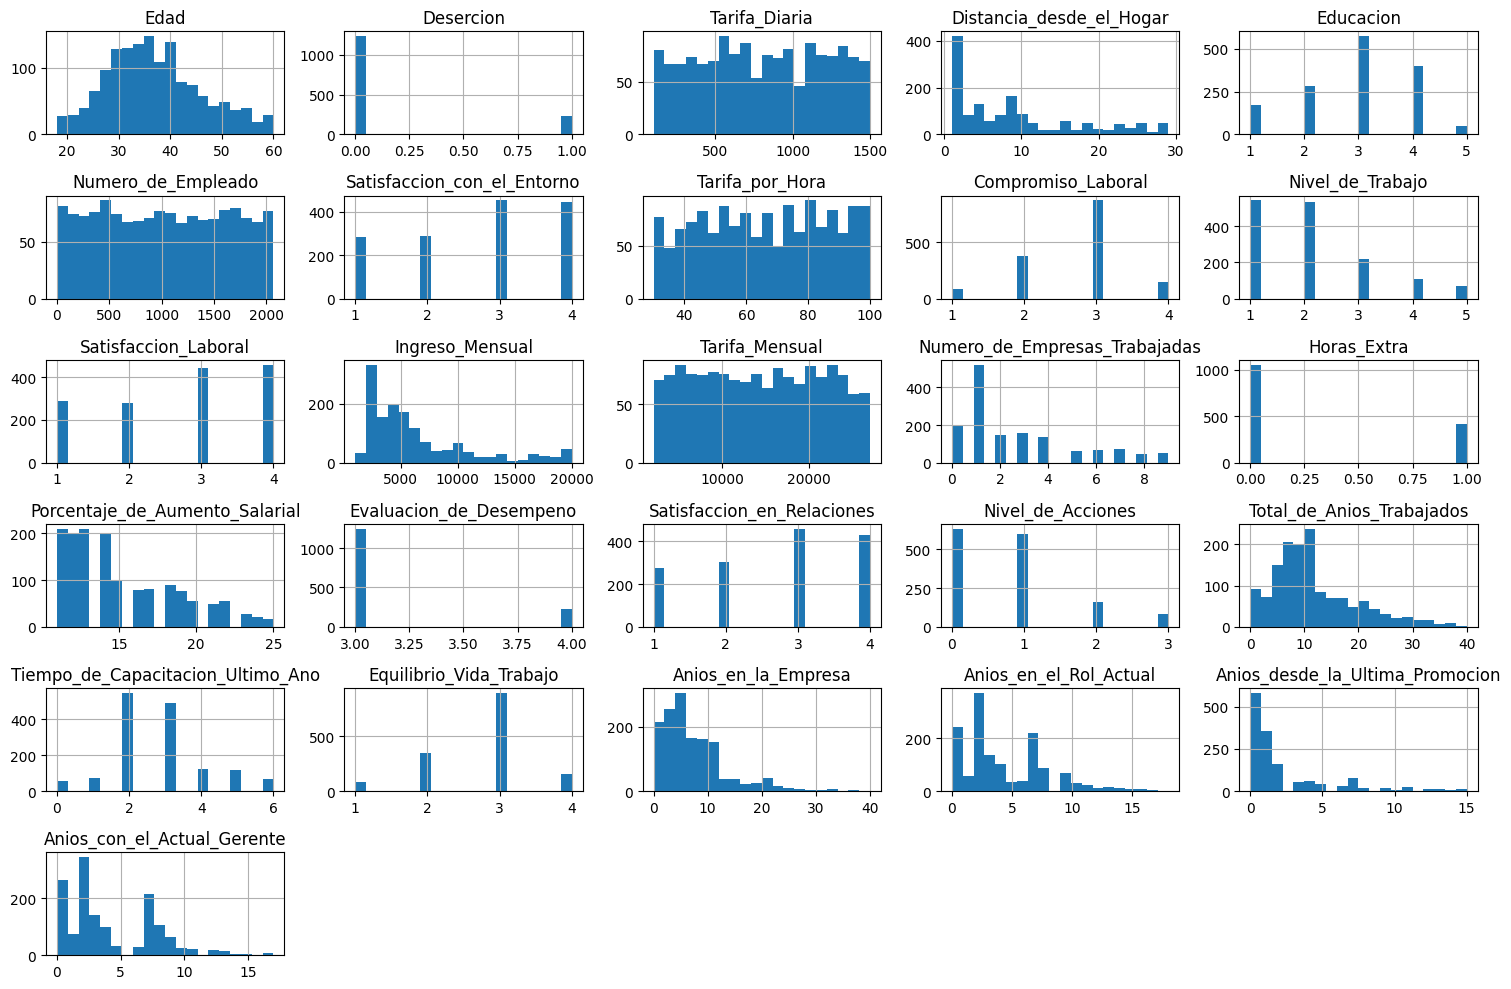

In [28]:
# Seleccionar solo columnas numéricas
columnas_numericas = datos.select_dtypes(include=['int64', 'float64']).columns

# Graficar histogramas
datos[columnas_numericas].hist(figsize=(15, 10), bins=20)
# tight_layout() -> se encarga de ajustar automáticamente el espacio entre los subplots de una figura.
#Esto significa que los gráficos no se
#superpondrán y se verán más ordenados y estéticos.
plt.tight_layout()
plt.show()

### Transformacion de Datos :

In [29]:
# Se reemplaza por la traduccion los valores columna Rol_de_Trabajo

traduccion_roles = {
    'Sales Executive': 'Ejecutivo de Ventas',
    'Research Scientist': 'Científico Investigador',
    'Laboratory Technician': 'Técnico de Laboratorio',
    'Manufacturing Director': 'Director de Manufactura',
    'Healthcare Representative': 'Representante de Salud',
    'Manager': 'Gerente',
    'Sales Representative': 'Representante de Ventas',
    'Research Director': 'Director de Investigación',
    'Human Resources': 'Recursos Humanos'
}

datos['Rol_de_Trabajo'] = datos['Rol_de_Trabajo'].replace(traduccion_roles)

In [30]:
# Se reemplaza por la traduccion los valores   columna  Viaje_de_Negocios'
traduccion_viaje = {
    'Travel_Rarely': 'Viajes Raros',
    'Travel_Frequently': 'Viajes Frecuentes',
    'Non-Travel': 'Sin Viajes'
}

datos['Viaje_de_Negocios'] = datos['Viaje_de_Negocios'].replace(traduccion_viaje)

In [31]:
# Se reemplaza por la traduccion los valores   columna  Departamento

traduccion_departamento = {
    'Sales': 'Ventas',
    'Research & Development': 'Investigación y Desarrollo',
    'Human Resources': 'Recursos Humanos'
}

datos['Departamento'] = datos['Departamento'].replace(traduccion_departamento)

In [32]:
# Se reemplaza por la traduccion los valores   columna  Campo_de_Educacion

traduccion_campo_educacion = {
    'Life Sciences': 'Ciencias de la Vida',
    'Medical': 'Médica',
    'Marketing': 'Marketing',
    'Technical Degree': 'Grado Técnico',
    'Other': 'Otro',
    'Human Resources': 'Recursos Humanos'
}

datos['Campo_de_Educacion'] = datos['Campo_de_Educacion'].replace(traduccion_campo_educacion)

In [33]:
# Se reemplaza por la traduccion los valores   columna  Genero

datos['Genero'] = datos['Genero'].replace({'Male': 'Masculino', 'Female': 'Femenino'})


In [34]:
# Se reemplaza por la traduccion los valores   columna  Desercion. 1 como Si  y  0 como No

traduccion_desercion = {
    1: 'Si',
    0: 'No'
}

datos['Desercion'] = datos['Desercion'].replace(traduccion_desercion)

In [35]:
# Se reemplaza por la traduccion los valores   columna  estado civil
traduccion_campo_estado_civil = {
    'Single': 'Soltero',
    'Married': 'Casado',
    'Divorced': 'Divorciado'
}

datos['Estado_Civil'] = datos['Estado_Civil'].replace(traduccion_campo_estado_civil)

In [36]:
# Se reemplaza por la traduccion los valores   columna  Desercion. 1 como Si  y  0 como No

traduccion_desercion = {
    1: 'Si',
    0: 'No'
}

datos['Desercion'] = datos['Desercion'].replace(traduccion_desercion)

In [37]:
# Se reemplaza por la traduccion los valores   columna  Hora  Extra. 1 como Si  y  0 como No

traduccion_horas_extra = {
    1: 'Si',
    0: 'No'
}

datos['Horas_Extra'] = datos['Horas_Extra'].replace(traduccion_horas_extra)

## Exportar CSV Limpio
Se guarda el archivo como csv para optimizar su manipulación

In [39]:
datos.to_csv('C:\Clases _ Phyton\IBM_DATOS_LIMPIOS', index=False)